In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [5]:
headlines = pd.read_csv("million-headlines.zip")

In [7]:
headlines = headlines['headline_text']
headlines.head()

0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [8]:
headlines[0]

'aba decides against community broadcasting licence'

In [9]:
import itertools as it

In [10]:
def sliding_window(txt):
    N = len(txt) - 1
    for i in range(N):
        yield txt[i], txt[i+1]

In [ ]:
# def sliding_window(txt):
#     N = len(txt) - 1
#     temp = []
#     for i in range(N):
#         temp.append(txt[i], txt[i+1])
#     return temp

In [11]:
# def function(list_):
#     temp = []
#     for i in list_:
#         temp.append(i**2)
#     return temp

In [12]:
# list_ = [1,2,3,4,5]
# function(list_)

[1, 4, 9, 16, 25]

In [23]:
# def function_2(list_):
#     for i in list_:
#         yield i, i**2


In [24]:
# list_ = [1,2,3,4,5]
# obj = function_2(list_)

In [25]:
# next(obj)
# next(obj)
# next(obj)

In [26]:
# list(obj)

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [27]:
window = list(it.chain(*[sliding_window(txt) for txt in headlines[:10000]]))

In [31]:
window

[('a', 'b'),
 ('b', 'a'),
 ('a', ' '),
 (' ', 'd'),
 ('d', 'e'),
 ('e', 'c'),
 ('c', 'i'),
 ('i', 'd'),
 ('d', 'e'),
 ('e', 's'),
 ('s', ' '),
 (' ', 'a'),
 ('a', 'g'),
 ('g', 'a'),
 ('a', 'i'),
 ('i', 'n'),
 ('n', 's'),
 ('s', 't'),
 ('t', ' '),
 (' ', 'c'),
 ('c', 'o'),
 ('o', 'm'),
 ('m', 'm'),
 ('m', 'u'),
 ('u', 'n'),
 ('n', 'i'),
 ('i', 't'),
 ('t', 'y'),
 ('y', ' '),
 (' ', 'b'),
 ('b', 'r'),
 ('r', 'o'),
 ('o', 'a'),
 ('a', 'd'),
 ('d', 'c'),
 ('c', 'a'),
 ('a', 's'),
 ('s', 't'),
 ('t', 'i'),
 ('i', 'n'),
 ('n', 'g'),
 ('g', ' '),
 (' ', 'l'),
 ('l', 'i'),
 ('i', 'c'),
 ('c', 'e'),
 ('e', 'n'),
 ('n', 'c'),
 ('c', 'e'),
 ('a', 'c'),
 ('c', 't'),
 ('t', ' '),
 (' ', 'f'),
 ('f', 'i'),
 ('i', 'r'),
 ('r', 'e'),
 ('e', ' '),
 (' ', 'w'),
 ('w', 'i'),
 ('i', 't'),
 ('t', 'n'),
 ('n', 'e'),
 ('e', 's'),
 ('s', 's'),
 ('s', 'e'),
 ('e', 's'),
 ('s', ' '),
 (' ', 'm'),
 ('m', 'u'),
 ('u', 's'),
 ('s', 't'),
 ('t', ' '),
 (' ', 'b'),
 ('b', 'e'),
 ('e', ' '),
 (' ', 'a'),
 ('a', 'w'),

In [28]:
pd.DataFrame(window)[0].unique()

array(['a', 'b', ' ', 'd', 'e', 'c', 'i', 's', 'g', 'n', 't', 'o', 'm',
       'u', 'y', 'r', 'l', 'f', 'w', 'p', 'z', 'k', 'v', 'j', 'h', 'q',
       '1', '0', 'x', '8', '3', '4', '5', '2', '6', '7', '9'],
      dtype=object)

In [34]:
mapping = {c: i for i, c in enumerate(pd.DataFrame(window)[0].unique())}

integer_in = np.array([mapping[w[0]] for w in window])
integer_out = np.array([mapping[w[1]] for w in window]).reshape(-1, 1)
integer_out

array([[ 1],
       [ 0],
       [ 2],
       ...,
       [16],
       [11],
       [19]])

In [35]:
num_letters = len(mapping)
num_letters

37

In [36]:
model_emb = tf.keras.Sequential()

In [37]:
embedding = tf.keras.layers.Embedding(num_letters, 2, input_length=1)

In [38]:
model_emb.add(embedding)
output_array = model_emb.predict(integer_in)
output_array.shape

(386880, 1, 2)

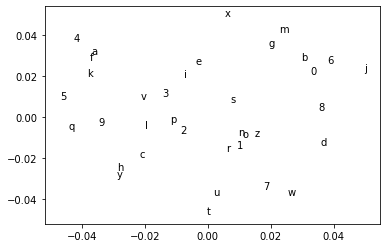

In [40]:
import matplotlib.pylab as plt

idx_to_calc = list(mapping.values())
idx_to_calc = np.array([idx_to_calc]).T

translator = {v:k for k,v in mapping.items()}
preds = model_emb.predict(idx_to_calc)

plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
    plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])
    
plt.show()

In [41]:
model_pred = tf.keras.Sequential()

In [42]:
model_pred.add(embedding)
model_pred.add(tf.keras.layers.Flatten())
model_pred.add(tf.keras.layers.Dense(num_letters, activation="softmax"))

In [43]:
model_pred.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 2)              74        
_________________________________________________________________
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 37)                111       
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [44]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model_pred.compile(adam, "categorical_crossentropy", metrics=['accuracy'])

In [45]:
output_array = model_pred.predict(integer_in)

In [46]:
output_array.shape

(386880, 37)

In [49]:
from sklearn.preprocessing import OneHotEncoder

to_predict = OneHotEncoder(sparse=False).fit_transform(integer_out)
model_pred.fit(integer_in, to_predict, epochs=30, verbose=1)

Epoch 1/30
12090/12090 [==============================] - 8s 693us/step - loss: 2.7511 - accuracy: 0.1808
Epoch 2/30
12090/12090 [==============================] - 8s 634us/step - loss: 2.6723 - accuracy: 0.1917
Epoch 3/30
12090/12090 [==============================] - 8s 682us/step - loss: 2.6689 - accuracy: 0.1926
Epoch 4/30
12090/12090 [==============================] - 8s 666us/step - loss: 2.6675 - accuracy: 0.1955
Epoch 5/30
12090/12090 [==============================] - 9s 726us/step - loss: 2.6668 - accuracy: 0.1960
Epoch 6/30
12090/12090 [==============================] - 8s 621us/step - loss: 2.6660 - accuracy: 0.1957
Epoch 7/30
12090/12090 [==============================] - 8s 630us/step - loss: 2.6655 - accuracy: 0.1961
Epoch 8/30
12090/12090 [==============================] - 8s 703us/step - loss: 2.6650 - accuracy: 0.1962
Epoch 9/30
12090/12090 [==============================] - 7s 619us/step - loss: 2.6646 - accuracy: 0.1962
Epoch 10/30
12090/12090 [=====================

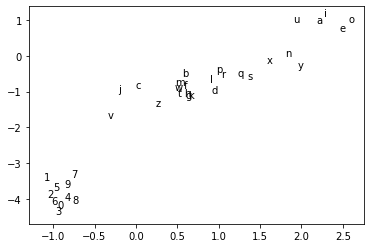

In [50]:
preds = model_emb.predict(idx_to_calc)
plt.scatter(preds[:, 0, 0], preds[:, 0, 1], alpha=0)
for i, idx in enumerate(idx_to_calc):
    plt.text(preds[i, 0, 0], preds[i, 0, 1], translator[idx[0]])
    
plt.show()